In [1]:
%matplotlib inline

from cProfile import label
import numpy as np
import matplotlib.pyplot as plt
from WeinerGenerator import getWeiner, getWeinerSubset
from scipy.stats import norm
import math
from tqdm.notebook import trange, tqdm

def plotWeinerSteps(steps, tend, maxsteps):
    ts, ws, dws, dt = getWeiner(steps, tend, 0)

    #fig, (fig1, fig2) = plt.subplots(1, 2)	# subplots(row, columns)

    plt.plot(ts, ws, color=((maxsteps-steps)/maxsteps, 0, steps/maxsteps))
    #fig2.scatter(ts, dws)

def plotRealizationDistribution(steps, realizations):
    fig, (fig1, fig2) = plt.subplots(1, 2)	# subplots(row, columns)
    endpoints = []
    for realization in range(realizations):
        ts, ws, dws, dt = getWeiner(steps, 10, realization)
        fig1.plot(ts, ws)
        endpoints.append(ws[-1])

    mu, std = norm.fit(endpoints)
    sigma = math.sqrt(std)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    y = norm.pdf(x, mu, sigma)
    fig2.plot(x, y)

    return x,y

def getRealizationDistribution(steps, realizations):
    endpoints = []
    for realization in range(realizations):
        ts, ws, dws, dt = getWeiner(steps, 10, realization)
        endpoints.append(ws[-1])

    mu, std = norm.fit(endpoints)
    sigma = math.sqrt(std)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    y = norm.pdf(x, mu, sigma)

    return x,y

  0%|          | 0/1000 [00:00<?, ?it/s]

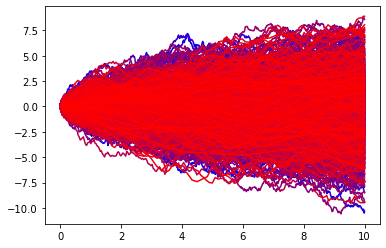

In [13]:
maxsteps = 1000
for steps in tqdm(range(maxsteps)):
   plotWeinerSteps(maxsteps-steps, 10, maxsteps)

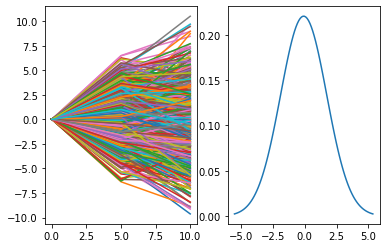

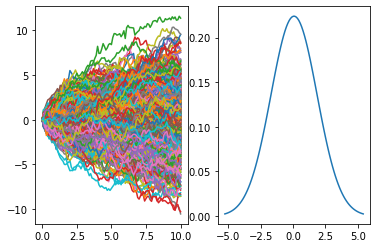

In [14]:
x1,y1 = plotRealizationDistribution(2, 1000)
x2,y2 = plotRealizationDistribution(100, 1000)

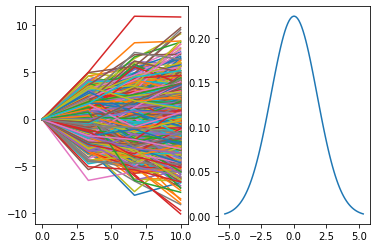

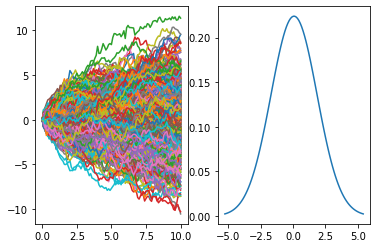

In [15]:
x1,y1 = plotRealizationDistribution(3, 1000)
x2,y2 = plotRealizationDistribution(100, 1000)

  0%|          | 0/48 [00:00<?, ?it/s]

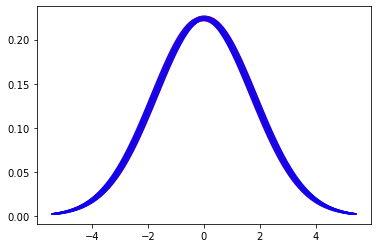

In [16]:
maxsteps = 50

fig3 = plt.figure()

for steps in tqdm(np.arange(2,maxsteps)):
    x,y = getRealizationDistribution(steps, 5000)
    plt.plot(x, y, color=((maxsteps-steps)/maxsteps, 0, steps/maxsteps), label = steps)

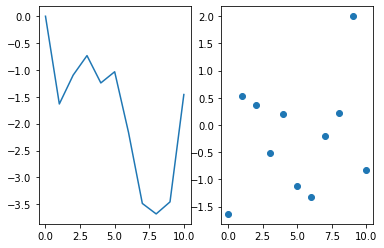

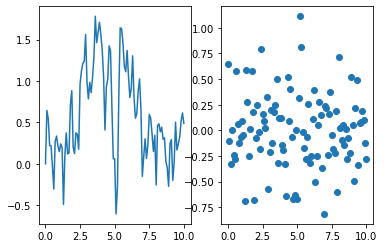

In [17]:
def plotWeiner(steps, tend, realization):
    ts, ws, dws, dt = getWeiner(steps, tend, realization)

    fig, (fig1, fig2) = plt.subplots(1, 2)	# subplots(row, columns)

    fig1.plot(ts, ws)
    fig2.scatter(ts, dws)

plotWeiner(10, 10, 1)
plotWeiner(100, 10, 1)

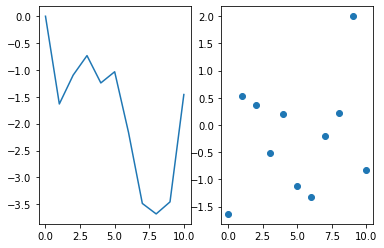

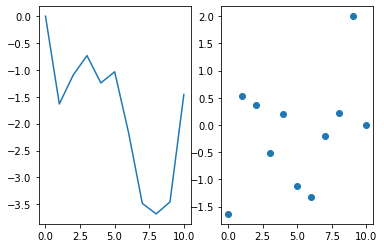

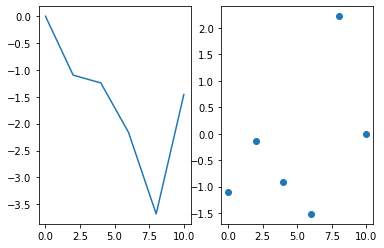

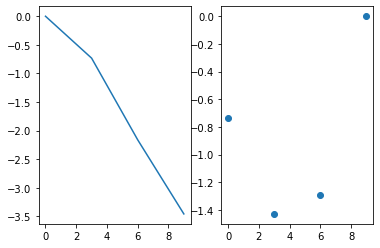

In [18]:
def plotWeinerSubset(nth, steps, tend, realization):
    ts, ws, dws, dt = getWeinerSubset(nth, steps, tend, realization)

    fig, (fig1, fig2) = plt.subplots(1, 2)	# subplots(row, columns)

    fig1.plot(ts, ws)
    fig2.scatter(ts, dws)

plotWeiner(10, 10, 1)
plotWeinerSubset(1, 10, 10, 1)
plotWeinerSubset(2, 10, 10, 1)
plotWeinerSubset(3, 10, 10, 1)

0
1
1.0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
0
2
2.0
[ 0.  2.  4.  6.  8. 10.]
0
5
5.0
[ 0.  5. 10.]


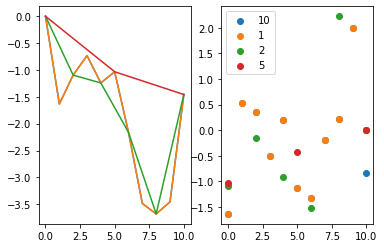

In [3]:
def plotWeiner1(steps, tend, realization):
    ts, ws, dws, dt = getWeiner(steps, tend, realization)

    fig1.plot(ts, ws, label = steps)
    fig2.scatter(ts, dws, label = steps)

def plotWeinerSubset1(nth, steps, tend, realization):
    ts, ws, dws, dt = getWeinerSubset(nth, steps, tend, realization)

    fig1.plot(ts, ws, label = nth)
    fig2.scatter(ts, dws, label = nth)
    print(nth)
    print(dt)
    print(ts)

fig, (fig1, fig2) = plt.subplots(1, 2)	# subplots(row, columns)
plotWeiner1(10, 10, 1)
plotWeinerSubset1(1, 10, 10, 1)
plotWeinerSubset1(2, 10, 10, 1)
#plotWeinerSubset1(3, 10, 10, 1)
#plotWeinerSubset1(4, 10, 10, 1)
plotWeinerSubset1(5, 10, 10, 1)

plt.legend()

Checking if subset also needs a storage system but apparently it's about as fast to generate it as reading from file

reading from file time 0.4849989414215088
generating from previous 0.5039994716644287


No handles with labels found to put in legend.


generating from previous 0.43000054359436035


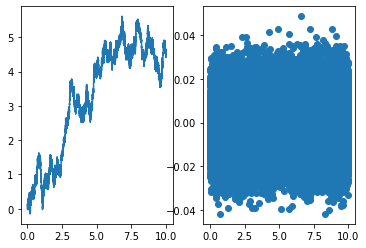

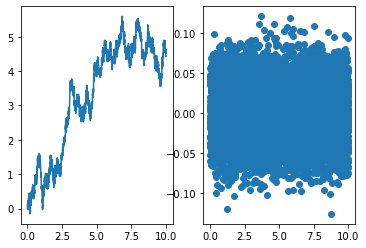

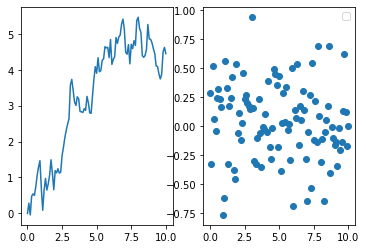

In [33]:
import time

lastTime = time.time()
plotWeiner(100000, 10, 1)
newTime = time.time()
print(f"reading from file time {newTime - lastTime}")
lastTime = newTime

plotWeinerSubset(10, 100000, 10, 1)
newTime = time.time()
print(f"generating from previous {newTime - lastTime}")
lastTime = newTime

plotWeinerSubset(1000, 100000, 10, 1)
newTime = time.time()
print(f"generating from previous {newTime - lastTime}")
lastTime = newTime

plt.legend()